### 간략한 데이터 요약
- 10,000개의 샘플과 18개의 컬럼이 존재합니다.
- 모든 컬럼에 결측값은 없으며, object(범주형) 5개, int64(정수형) 6개, float64(실수형) 7개로 구성되어 있습니다.
- 신용 점수의 평균은 744점이며, 채무 불이행 여부(0: 정상, 1: 불이행) 비율은 약 34%가 불이행 상태입니다.
- 주거 형태는 ‘월세’가 가장 많고, 대출 목적으로 ‘부채 통합’이 가장 많이 사용되었습니다.
- 연간 소득의 범위가 넓고, 최대 신용한도 및 현재 대출 잔액도 분포 차이가 큽니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./default/train.csv")

# 기본 정보 확인
print("📌 데이터 크기:", df.shape)
print("\n📌 데이터 타입 및 결측치 개요:")
print(df.info())

📌 데이터 크기: (10000, 18)

📌 데이터 타입 및 결측치 개요:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-

In [4]:
# 기초 통계
print("\n📌 수치형 변수 요약:")
print(df.describe())


📌 수치형 변수 요약:
              연간 소득   체납 세금 압류 횟수    개설된 신용계좌 수      신용 거래 연수       최대 신용한도  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  1.000000e+04   
mean   2.163959e+06      0.199300     12.248900     19.879360  1.175265e+06   
std    1.434430e+06      0.714304      4.620572      7.206693  1.604199e+06   
min    2.676210e+05      0.000000      2.000000      6.000000  0.000000e+00   
25%    1.311437e+06      0.000000      9.000000     14.600000  4.482476e+05   
50%    1.743223e+06      0.000000     12.000000     17.950000  7.670910e+05   
75%    2.447664e+06      0.000000     15.000000     24.100000  1.147283e+06   
max    1.722975e+07      7.000000     35.000000     51.700000  2.323233e+07   

       신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수      개인 파산 횟수      현재 대출 잔액  \
count  10000.00000       10000.000000  10000.000000  1.000000e+04   
mean       0.62620          30.889200      0.373200  5.061200e+05   
std        1.23419          20.011561      0.843797  2.831462e+05  

In [6]:
# 결측치 확인
print("\n📌 결측치 개수:")
print(df.isnull().sum())


📌 결측치 개수:
UID                  0
주거 형태                0
연간 소득                0
현재 직장 근속 연수          0
체납 세금 압류 횟수          0
개설된 신용계좌 수           0
신용 거래 연수             0
최대 신용한도              0
신용 문제 발생 횟수          0
마지막 연체 이후 경과 개월 수    0
개인 파산 횟수             0
대출 목적                0
대출 상환 기간             0
현재 대출 잔액             0
현재 미상환 신용액           0
월 상환 부채액             0
신용 점수                0
채무 불이행 여부            0
dtype: int64


In [8]:
# 중복값 확인
print("\n📌 중복된 행 개수:", df.duplicated().sum())


📌 중복된 행 개수: 0


In [10]:
# 범주형 변수 고유값 확인
categorical_columns = df.select_dtypes(include=['object']).columns
# UID는 제외할 것
for col in categorical_columns[1:]:
    print(f"\n📌 [{col}]의 고유값 분포:")
    print(df[col].value_counts())


📌 [주거 형태]의 고유값 분포:
주거 형태
월세                  4050
주택 담보 대출 (거주 중)     3633
자가                  2241
주택 담보 대출 (비거주 중)      76
Name: count, dtype: int64

📌 [현재 직장 근속 연수]의 고유값 분포:
현재 직장 근속 연수
10년 이상    3828
2년        1225
8년         841
5년         729
7년         619
1년         581
4년         541
3년         523
1년 미만      488
6년         357
9년         268
Name: count, dtype: int64

📌 [대출 목적]의 고유값 분포:
대출 목적
부채 통합        7294
기타            970
주택 개보수        909
사업 대출         254
여행 자금         173
의료비           158
자동차 구매         95
고액 구매          68
소규모 사업 자금      26
주택 구매          26
결혼 자금          14
휴가 비용           6
이사 비용           4
교육비             3
Name: count, dtype: int64

📌 [대출 상환 기간]의 고유값 분포:
대출 상환 기간
단기 상환    6975
장기 상환    3025
Name: count, dtype: int64


데이터의 형태, 기초통계량, 요약, 결측치 개수 등을 확인한 후 이어서 단계적이고 점진적인 탐색적 데이터 분석을 실시한다.

In [12]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import os

print("Matplotlib 기본 폰트:", matplotlib.rcParams['font.family'])

Matplotlib 기본 폰트: ['sans-serif']


출력되는 폰트가 한글을 지원하지 않는다면 반드시 강제 지정이 필요!

미리 터미널에 fc-list | grep "Nanum" 을 입력하고 확인한다.  
출력되지 않으면 폰트가 설치되지 않았다는 것이므로 설치한다.

NanumBarunGothic


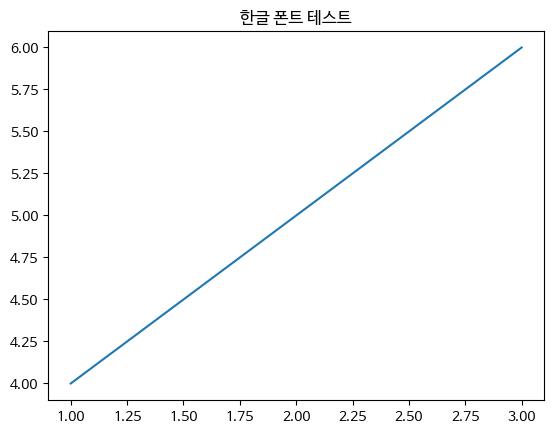

In [14]:
# 폰트 강제 지정 시작

# 설치된 한글 폰트 경로 직접 지정
font_path = "NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path,size=12)

# 폰트 설정 적용
plt.rc('font',family=font_prop.get_name())
print(font_prop.get_name())

# 테스트
plt.title("한글 폰트 테스트", fontsize=15, fontproperties=font_prop)
plt.plot([1,2,3],[4,5,6])
plt.show()

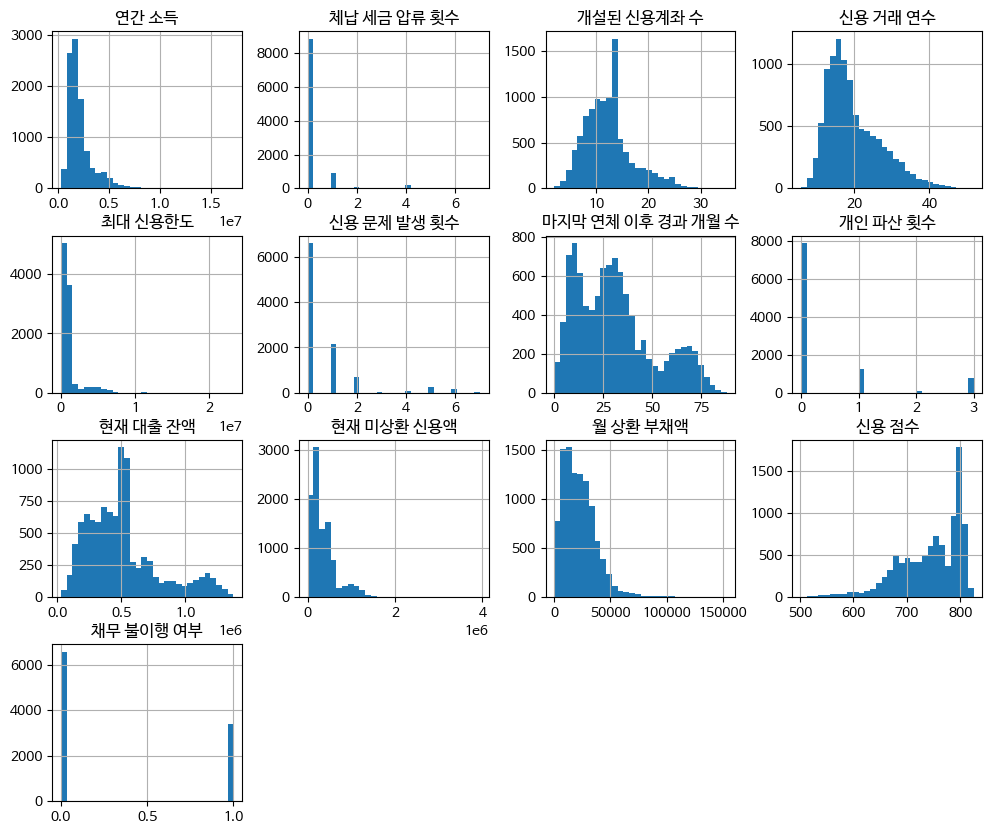

In [18]:
# 수치형 컬럼별 분포 확인

df.hist(figsize=(12,10),bins=30)
plt.show()

- 히스토그램은 **데이터의 빈도수(frequency)** 를 보여주는 것이지, 확률 밀도 함수(PDF: Probability Density Function)와 동일한 개념이 아니다.
- 따라서 평균을 중심으로 대칭적이어야 할 이유는 없으며, 실제 데이터의 특성(왜도, 첨도 등)에 따라 비대칭적으로 나타날 수 있다.
- 정규성을 가정하는 분석(예: t-검정, ANOVA 등)을 수행하려는 경우라면, 히스토그램만 보고 단순히 판단하기보다는 Q-Q plot이나 Shapiro-Wilk 테스트 같은 추가적인 정규성 검정을 수행하는 것이 필요하다.

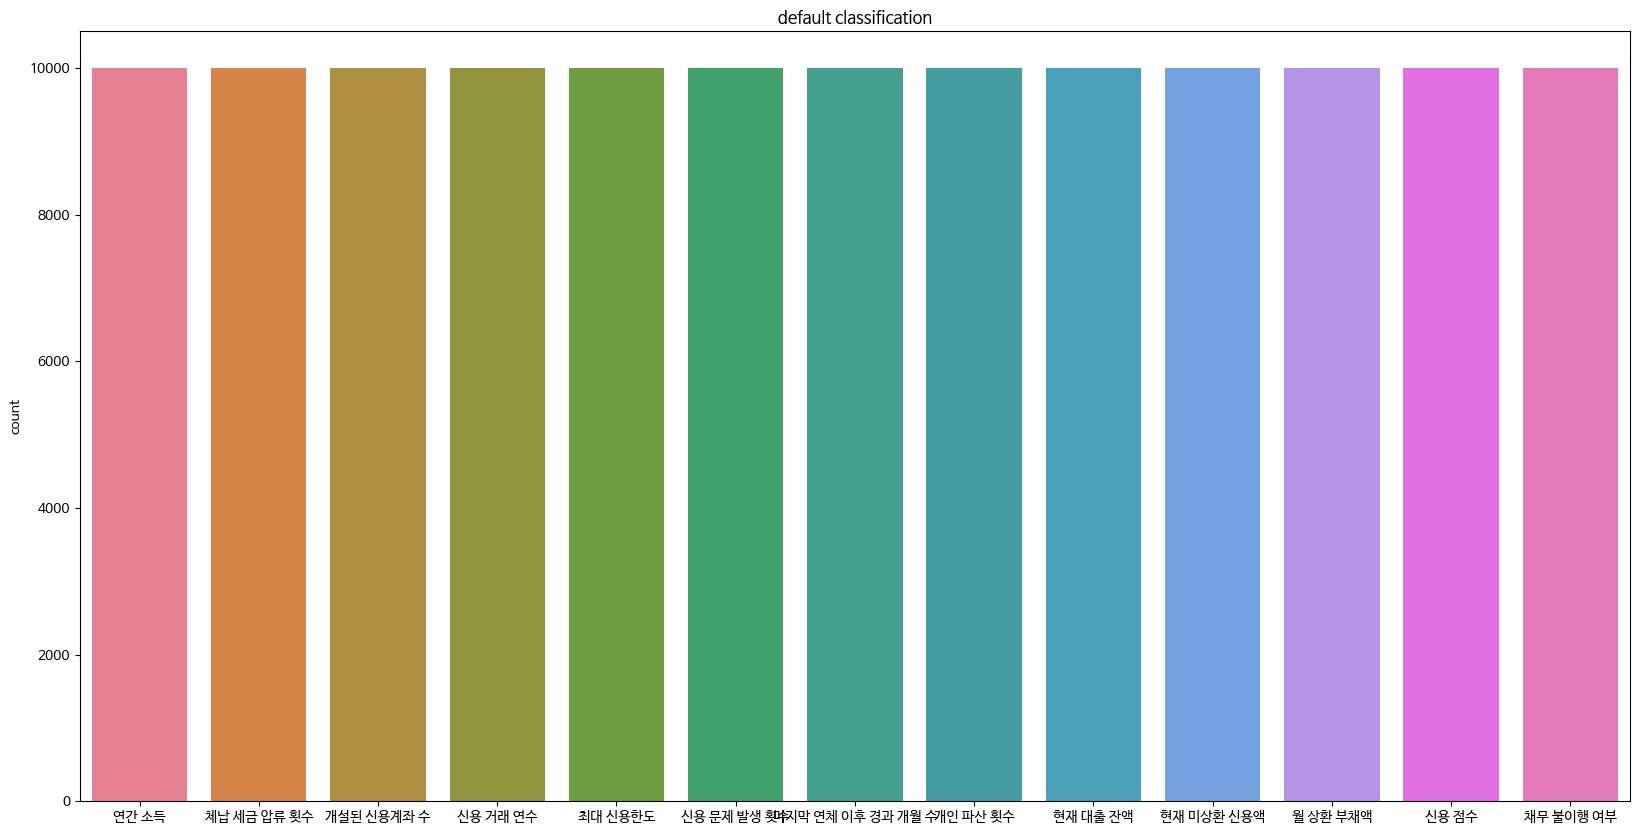

In [28]:
# 타겟 변수 분포 확인
plt.figure(figsize=(20,10))
sns.countplot(data=df)
plt.title("default classification")
plt.show()

In [32]:
# 타겟 변수 설정
target_col = "채무 불이행 여부"

df.columns = df.columns.str.strip()

numeric_columns = df.select_dtypes(include=['float64','int64']).columns
numeric_columns = numeric_columns.drop(target_col)

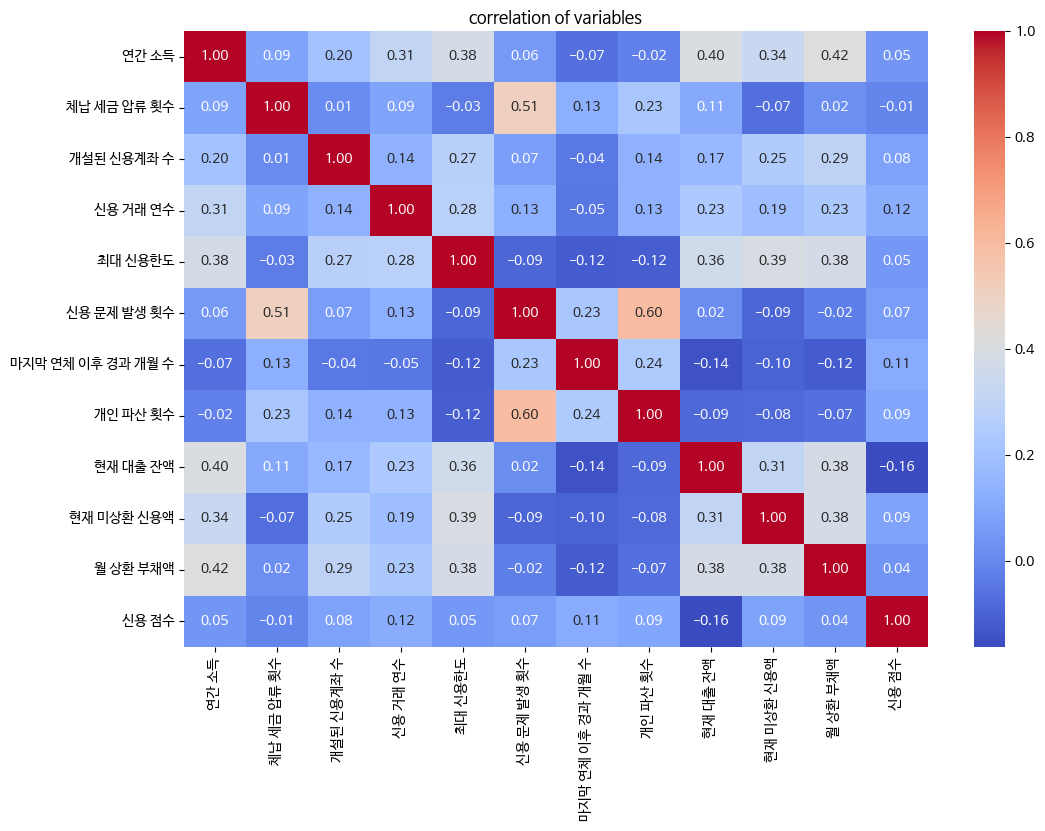

In [34]:
# 상관 관계 분석
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("correlation of variables")
plt.show()

### 상관 관계 분석 결과

가장 높은 상관계수는 0.60으로 **개인 파산 횟수** 와 **신용 문제 발생 횟수** 가 양의 상관성을 지니는 것으로 확인된다.  
하지만 "개인 파산 횟수" 자체는 금융사가 정하는 신용문제에 속하기 때문에 당연히 신용 문제가 증가할 수 밖에 없다.  
그 외에는 0.51 정도의 상관계수가 다음순으로 높으며 **체납세금 압류 횟수** 와 마찬가지로 **신용 문제 발생 횟수** 의 조합이다.

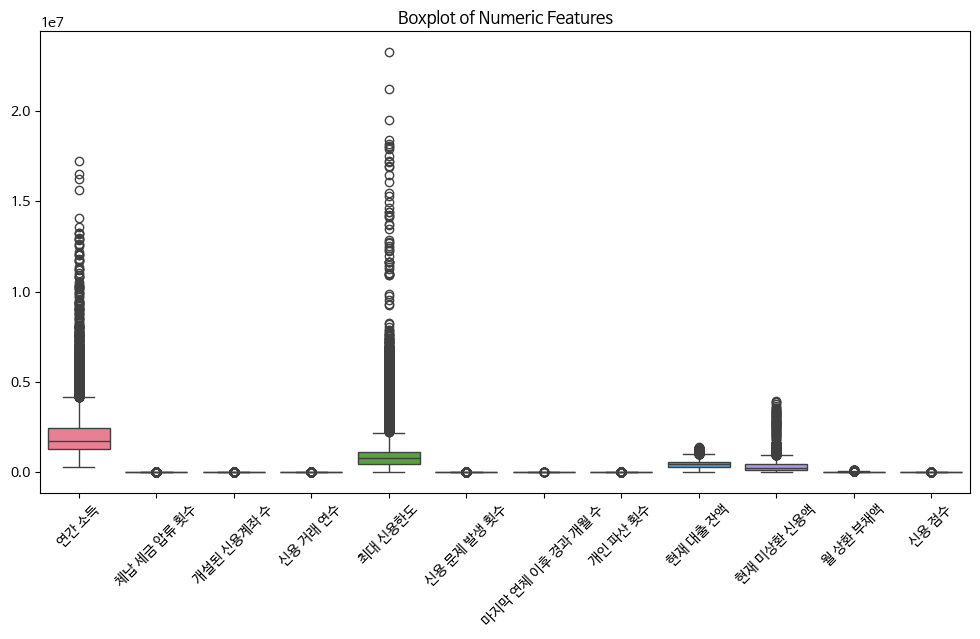

In [41]:
# 이상치 확인하기
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()

### 이상치 확인
대부분의 컬럼은 이상치 분포가 평이하게 나타나고 있다.  
하지만 **연견 소득** , **최대 신용한도** , **현재 대출 잔액** , **현재 미상환 신용액** 등의  
컬럼이 매우 큰 편차와 더불어 수염의 상한값을 초과하는 값이 확인 되어 따로 확인할 필요성이 보인다.

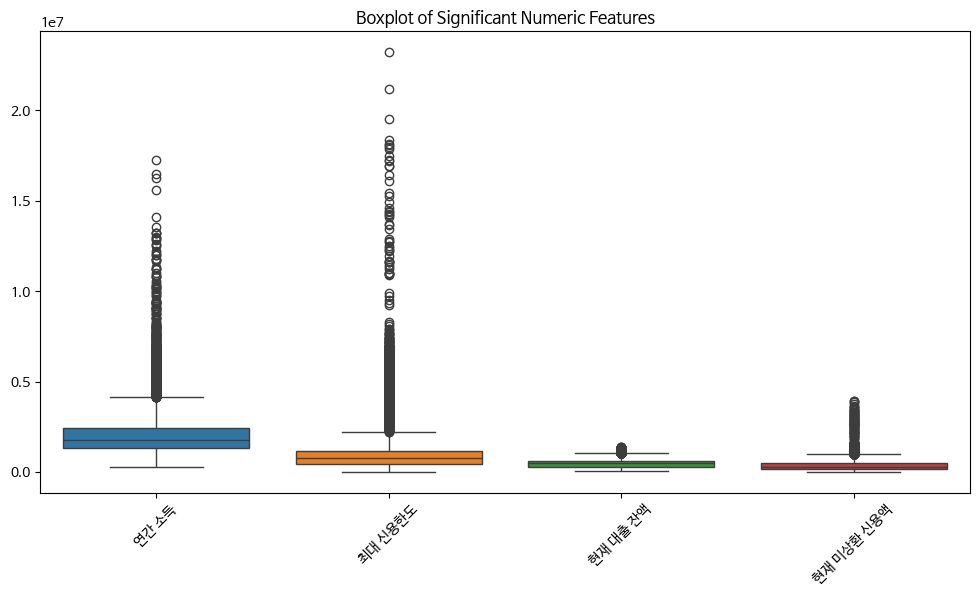

In [46]:
extract_significant_columns = ['연간 소득','최대 신용한도','현재 대출 잔액','현재 미상환 신용액']

plt.figure(figsize=(12,6))
sns.boxplot(data=df[extract_significant_columns])
plt.xticks(rotation=45)
plt.title("Boxplot of Significant Numeric Features")
plt.show()

이후 코드에서 이상치를 삭제하기 보다는 상한값으로 대치하는 등 작업을 취한다.

## EDA - 탐색적 데이터 분석
1. Add data preprocessing steps
- Missing value handling
- Outlier handling
- Categorical variable encoding
- Data normalization/standardization

2. Feature selection and engineering
- Correlation-based feature selection
- New feature creation through variable combination

3. Data splitting and model training
- Training set/test set splitting
- Basic model learning (Logistic Regression, Decision Tree, etc.)
- Model evaluation and tuning (using GridSearchCV, etc.)

In [58]:
# eda 1-1 결측치 처리하기
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("\n=== 결측치 개수 ===")
print(missing_values)


=== 결측치 개수 ===
Series([], dtype: int64)


In [60]:
# 결측치는 관찰되지 않지만 처리하는 코드를 작성해본다.

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64','float64']:
            # 수치형 컬럼은 중앙값으로 대체
            df[col].fillna(df[col].median(),inplace=True)
        else:
            # 범주형은 최빈값으로 대체
            df[col].fillna(df[col].mode(),inplace=True)

In [66]:
# eda 1-2 이상치 처리하기

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 제거 대신 클리핑(극단값을 경계값으로 조정)
    df[col] = np.clip(df[col],lower_bound, upper_bound)

In [68]:
# eda 1-3 범주형 변수 인코딩(레이블인코딩, 원핫인코딩)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [70]:
# eda 1-4 데이터 정규화, 표준화

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [72]:
# eda 2-1 상관분석 기반 피쳐 선택
# 선형 회귀에서는 다중공선성에 민감 다만, 랜덤포레스트에서는 덜 민감하기 때문에 생략

In [74]:
# eda 2-2 합성 피쳐 생성
# 신용평가 모델을 구축할 때 새로운 피쳐를 만들어 활용하는 경우가 대다수

In [80]:
# eda 3-1 데이터셋 분리 - train/test/validation
# 일반적인 분류에서는 학습용과 평가용으로 분류하며 8:2 혹은 7:3으로 분류한다.
# 검증용 데이터 셋을 고려할 때는 학습용:평가용:검증용 5:3:2로 분류한다.

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.dtype)
print(y_train.unique())

int64
[0 1]


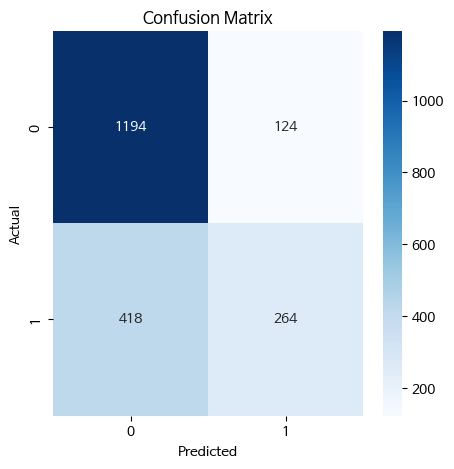

In [84]:
# eda 3-2 기본 모델 구축

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

✅ 정확도 (Accuracy): 0.7290
✅ 정밀도 (Precision): 0.6804
✅ 민감도 (Recall / Sensitivity): 0.3871
✅ 특이도 (Specificity): 0.9059
✅ F1-score: 0.4935
✅ AUC-ROC: 0.7301


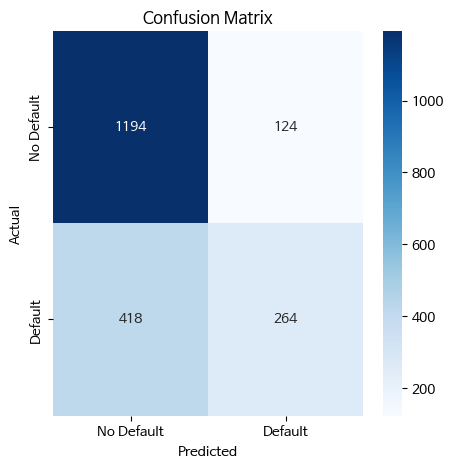

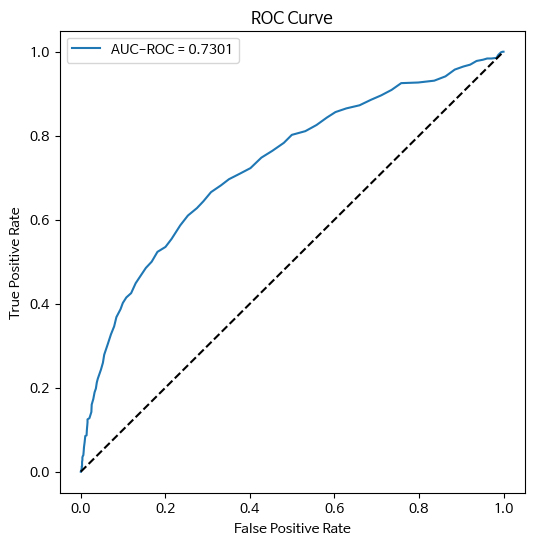

In [86]:
# eda 3-3 모델 평가 및 튜닝

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

# 예측 수행
y_pred = model.predict(X_test)  # 클래스 예측 (0 or 1)
y_prob = model.predict_proba(X_test)[:, 1]  # 확률 예측 (ROC-AUC 계산용)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# 개별 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # 민감도 (Sensitivity)
specificity = TN / (TN + FP)  # 특이도 (Specificity)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

# 결과 출력
print(f"✅ 정확도 (Accuracy): {accuracy:.4f}")
print(f"✅ 정밀도 (Precision): {precision:.4f}")
print(f"✅ 민감도 (Recall / Sensitivity): {recall:.4f}")
print(f"✅ 특이도 (Specificity): {specificity:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print(f"✅ AUC-ROC: {auc_roc:.4f}")

# 📌 혼동 행렬 시각화
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 📌 ROC 커브 시각화
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 (무작위 모델)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()